In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Hyundai-FLANT5.csv')
df['COMPSYS_1'] = df['COMPSYS_1'].str.split(',').str[0]

filtered_df = df[['LDATE','CDESCR', 'COMPSYS_1', 'LABELS_1', 'LABELS_2', 'LABELS_3']].copy()

filtered_df['LDATE_1M'] = pd.to_datetime(filtered_df['LDATE'], format='mixed').dt.to_period('M')
filtered_df['LDATE_1M'] = pd.to_datetime(filtered_df['LDATE_1M'].astype(str))

C:\Users\prith\AppData\Local\Temp\ipykernel_21708\1627840998.py:5: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Hyundai-FLANT5.csv')


In [155]:
important_parts = ['air bags', 'electrical system', 'fuel system', 'power train', 'seat belts', 'suspension', 'vehicle speed control', 'visibility', 'wheels', 'engine', 'service brakes']

def gen_true_pos_graph(filtered_df, system):
    new_df = filtered_df[filtered_df['COMPSYS_1']==system].copy()
    compsys_1 = new_df.groupby(by=['LDATE_1M', 'COMPSYS_1'])[['CDESCR']].count()
    label_1 = new_df[new_df['LABELS_1']==system].groupby(by=['LDATE_1M', 'LABELS_1'])[['CDESCR']].count()
    label_2 = new_df[new_df['LABELS_2']==system].groupby(by=['LDATE_1M', 'LABELS_2'])[['CDESCR']].count()
    if system == 'electrical system' or system == 'seat belts':
        label_3 = new_df[new_df['LABELS_3']=='other component'].groupby(by=['LDATE_1M', 'LABELS_3'])[['CDESCR']].count()
    else:
        label_3 = new_df[new_df['LABELS_3']==system].groupby(by=['LDATE_1M', 'LABELS_3'])[['CDESCR']].count()
    
    all_label_1 = filtered_df[filtered_df['LABELS_1']==system].groupby(by=['LDATE_1M', 'LABELS_1'])[['CDESCR']].count()
    all_label_2 = filtered_df[filtered_df['LABELS_2']==system].groupby(by=['LDATE_1M', 'LABELS_2'])[['CDESCR']].count()
    if system == 'electrical system' or system == 'seat belts':
        all_label_3 = filtered_df[filtered_df['LABELS_3']=='other component'].groupby(by=['LDATE_1M', 'LABELS_3'])[['CDESCR']].count()
    else:
        all_label_3 = filtered_df[filtered_df['LABELS_3']==system].groupby(by=['LDATE_1M', 'LABELS_3'])[['CDESCR']].count()

    f, (ax1, ax2) = plt.subplots(2,1, sharey=True)

    sns.lineplot(compsys_1, x='LDATE_1M', y='CDESCR', errorbar=None , ax=ax1, label='actual')
    sns.lineplot(label_1, x='LDATE_1M', y='CDESCR',errorbar=None, ax=ax1, label='prompt_no_parts')
    sns.lineplot(label_2, x='LDATE_1M', y='CDESCR',errorbar=None, ax=ax1, label='prompt_with_parts')
    sns.lineplot(label_3, x='LDATE_1M', y='CDESCR',errorbar=None, ax=ax1, label='prompt_emergent_parts')
    
    ax1.set_title('TP')
    
    sns.lineplot(compsys_1, x='LDATE_1M', y='CDESCR', errorbar=None , ax=ax2, label='actual')
    sns.lineplot(all_label_1, x='LDATE_1M', y='CDESCR',errorbar=None, ax=ax2, label='prompt_no_parts')
    sns.lineplot(all_label_2, x='LDATE_1M', y='CDESCR',errorbar=None, ax=ax2, label='prompt_with_parts')
    sns.lineplot(all_label_3, x='LDATE_1M', y='CDESCR',errorbar=None, ax=ax2, label='prompt_emergent_parts')
    
    ax2.set_title('TP+FP')

    plt.suptitle(f'2014-2023 Hyundai Engine {system} complaints')
    plt.xlabel('Months')
    plt.ylabel('Complaint counts')
    plt.tight_layout()



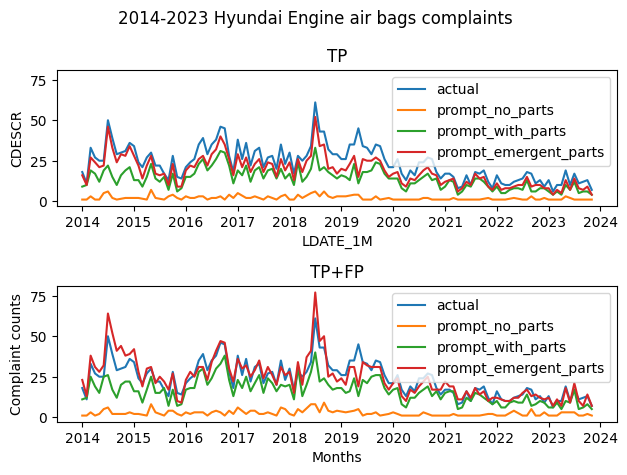

In [156]:
gen_true_pos_graph(filtered_df, important_parts[0])

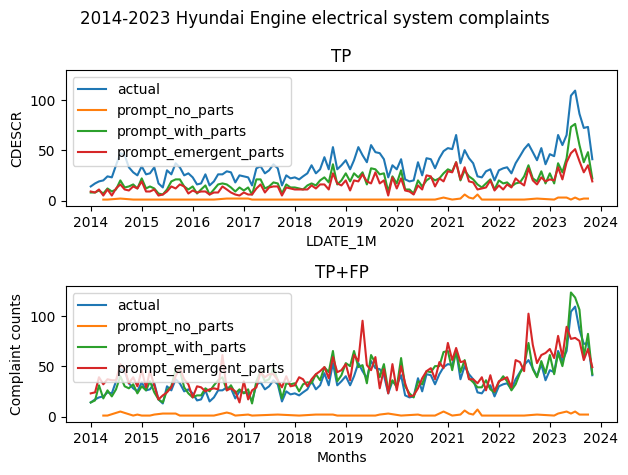

In [157]:
gen_true_pos_graph(filtered_df, important_parts[1])

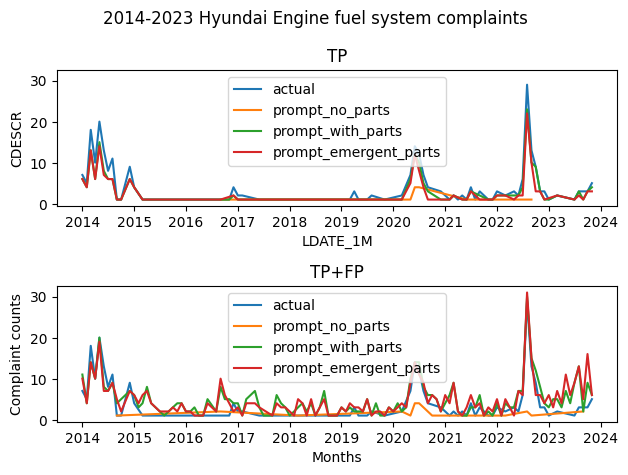

In [158]:
gen_true_pos_graph(filtered_df, important_parts[2])

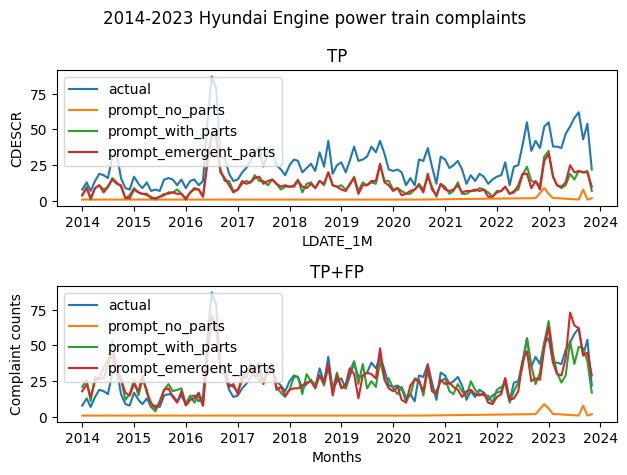

In [159]:
gen_true_pos_graph(filtered_df, important_parts[3])

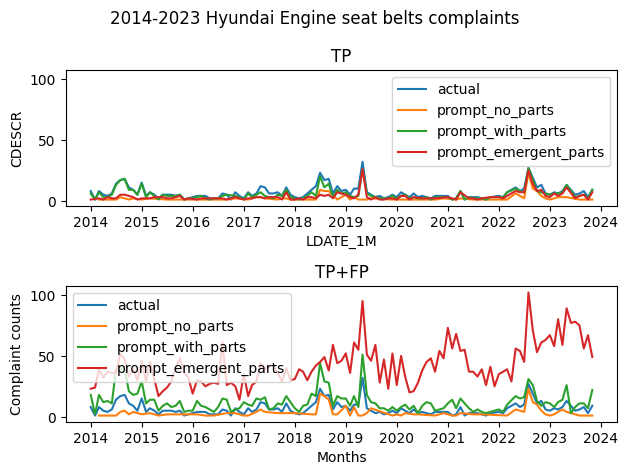

In [160]:
gen_true_pos_graph(filtered_df, important_parts[4])

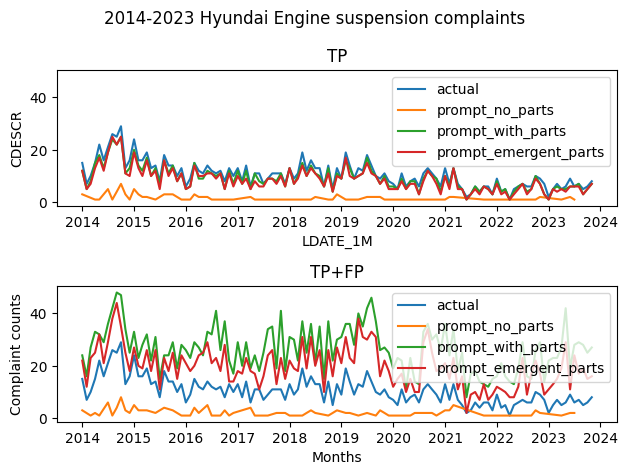

In [161]:
gen_true_pos_graph(filtered_df, important_parts[5])

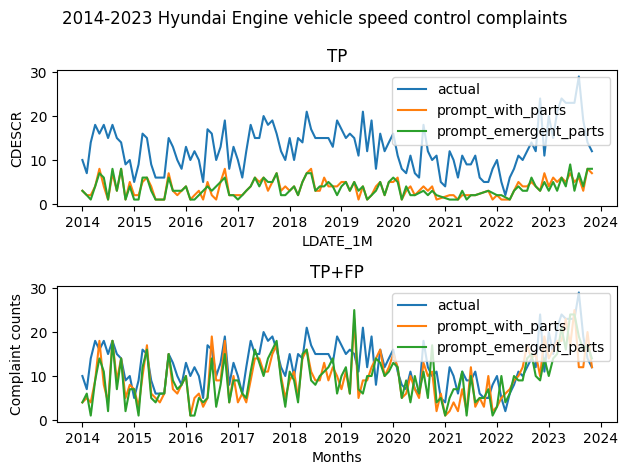

In [162]:
gen_true_pos_graph(filtered_df, important_parts[6])

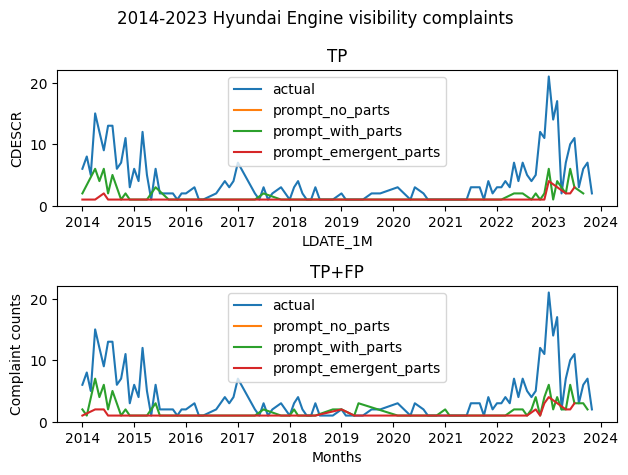

In [163]:
gen_true_pos_graph(filtered_df, important_parts[7])

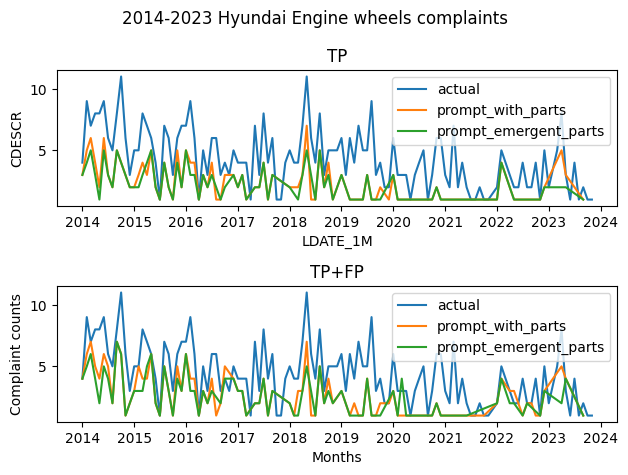

In [164]:
gen_true_pos_graph(filtered_df, important_parts[8])

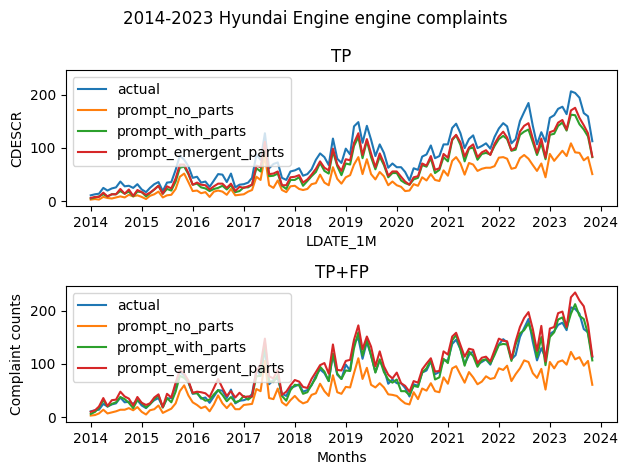

In [165]:
gen_true_pos_graph(filtered_df, important_parts[9])

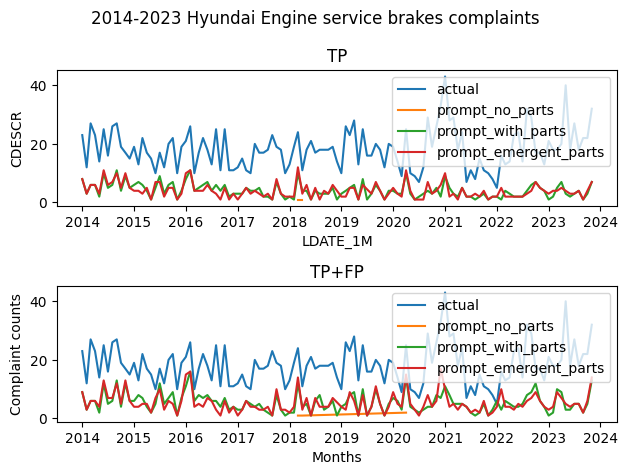

In [166]:
gen_true_pos_graph(filtered_df, important_parts[10])

In [167]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(filtered_df['COMPSYS_1'], filtered_df['LABELS_1']), f1_score(filtered_df['COMPSYS_1'], filtered_df['LABELS_1'], average='macro')

(0.20255467676655156, 0.00028080648642079897)

In [168]:
accuracy_score(filtered_df['COMPSYS_1'], filtered_df['LABELS_2']), f1_score(filtered_df['COMPSYS_1'], filtered_df['LABELS_2'], average='macro')

(0.5895065166536705, 0.09427588772166683)

In [169]:
filtered_df
accuracy_score(filtered_df['COMPSYS_1'], filtered_df['LABELS_3']), f1_score(filtered_df['COMPSYS_1'], filtered_df['LABELS_3'], average='macro')

(0.5104155062938621, 0.13208667768360496)